In [1]:
import pandas as pd

In [2]:
#pip install git+https://github.com/quantopian/pyfolio
# import again if first time not work
import pyfolio

C:\Users\Andy\PycharmProjects\finrlpaper1\Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020\finrlpaperv4\Lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [3]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

# BCAP: choose model / run to backtest manually
RESULTS_DIR = "results/firstRun"

In [4]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    #df=df.dropna()
    print('Sharpe: ',(252**0.5)*df['daily_return'].mean()/ df['daily_return'].std())
    return df

In [5]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'])
    strategy_ret.set_index('Date', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

In [6]:
def get_account_value(model_name, RESULTS_DIR):
    df_account_value=pd.DataFrame()
    for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
        temp = pd.read_csv('{}/account_value_trade_{}_{}.csv'.format(RESULTS_DIR, model_name,i))
        df_account_value = df_account_value.append(temp,ignore_index=True)
    df_account_value = pd.DataFrame({'account_value':df_account_value['0']})
    sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
    print(sharpe)
    df_account_value=df_account_value.join(df_trade_date[63:].reset_index(drop=True))
    return df_account_value

## DJIA

In [7]:
dji = pd.read_csv("data/^DJI.csv")
test_dji=dji[(dji['Date']>='2016-01-01') & (dji['Date']<='2020-06-30')]
test_dji = test_dji.reset_index(drop=True)

In [8]:
dji.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,8772.250000,9065.280273,8760.780273,9034.690430,9034.690430,213700000
1,2009-01-05,9027.129883,9034.370117,8892.360352,8952.889648,8952.889648,233760000
2,2009-01-06,8954.570313,9088.059570,8940.950195,9015.099609,9015.099609,215410000
3,2009-01-07,8996.940430,8996.940430,8719.919922,8769.700195,8769.700195,266710000
4,2009-01-08,8769.940430,8770.019531,8651.190430,8742.459961,8742.459961,226620000


In [9]:
dji.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2923,2020-08-13,27922.509766,27986.099609,27789.779297,27896.720703,27896.720703,360160000
2924,2020-08-14,27828.929688,27977.810547,27759.390625,27931.019531,27931.019531,275540000
2925,2020-08-17,27970.050781,27999.810547,27816.400391,27844.910156,27844.910156,286860000
2926,2020-08-18,27853.480469,27891.119141,27668.789063,27778.070313,27778.070313,276170000
2927,2020-08-19,27811.259766,27920.419922,27647.669922,27692.880859,27692.880859,311460000


In [10]:
test_dji.shape

(1131, 7)

In [11]:
test_dji.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


In [12]:
test_dji['daily_return']=test_dji['Adj Close'].pct_change(1)

In [13]:
dow_strat = backtest_strat(test_dji)

In [14]:
dow_strat

Date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00    0.000567
2016-01-06 00:00:00+00:00   -0.014695
2016-01-07 00:00:00+00:00   -0.023211
2016-01-08 00:00:00+00:00   -0.010152
                               ...   
2020-06-24 00:00:00+00:00   -0.027151
2020-06-25 00:00:00+00:00    0.011776
2020-06-26 00:00:00+00:00   -0.028356
2020-06-29 00:00:00+00:00    0.023196
2020-06-30 00:00:00+00:00    0.008481
Length: 1131, dtype: float64

## Ensemble Strategy

In [15]:
df=pd.read_csv('data/dow_30_2009_2020.csv')

In [16]:
rebalance_window = 63
validation_window = 63
unique_trade_date = df[(df.datadate > 20151001)&(df.datadate <= 20200707)].datadate.unique()

In [17]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

In [18]:
ensemble_account_value = get_account_value('ensemble',RESULTS_DIR)

1.5161118660149853


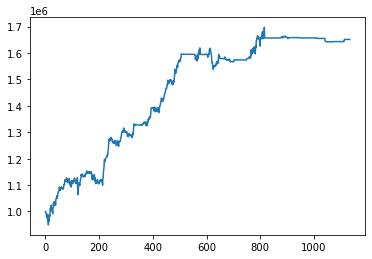

In [19]:
ensemble_account_value.account_value.plot()

In [20]:
ensemble_account_value = get_daily_return(ensemble_account_value)

Sharpe:  1.5161118660149853


In [21]:
ensemble_account_value['Date'] = test_dji['Date']

In [22]:
ensemble_account_value.head()

,account_value,datadate,daily_return,Date
0,1.000000e+06,20160104,NaN,2016-01-04
1,1.000096e+06,20160105,0.000096,2016-01-05
2,9.963688e+05,20160106,-0.003727,2016-01-06
3,9.883389e+05,20160107,-0.008059,2016-01-07
4,9.844544e+05,20160108,-0.003930,2016-01-08


In [23]:
ensemble_account_value.tail()

,account_value,datadate,daily_return,Date
1129,1.651497e+06,20200629,0.0,2020-06-29
1130,1.651497e+06,20200630,0.0,2020-06-30
1131,1.651497e+06,20200701,0.0,NaN
1132,1.651497e+06,20200702,0.0,NaN
1133,1.651497e+06,20200706,0.0,NaN


In [24]:
ensemble_strat = backtest_strat(ensemble_account_value[0:1097])

In [25]:
#ensemble_account_value.to_csv('results/df_account_value_ensemble_daily_return.csv',index=False)

Start date,2016-01-04
End date,2020-05-12
Total months,52
,Backtest
Annual return,12.087%
Cumulative returns,64.332%
Annual volatility,7.672%
Sharpe ratio,1.53
Calmar ratio,2.15
Stability,0.85
Max drawdown,-5.626%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,5.63,2016-06-23,2016-06-27,2016-07-14,16
1,5.09,2016-01-05,2016-01-20,2016-01-29,19
2,4.99,2018-04-17,2018-06-27,2019-02-05,211
3,4.59,2016-08-11,2016-11-04,2016-11-10,66
4,3.25,2019-04-01,2020-03-02,NaT,NaN


C:\Users\Andy\PycharmProjects\finrlpaper1\Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020\finrlpaperv4\Lib\site-packages\pyfolio\tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


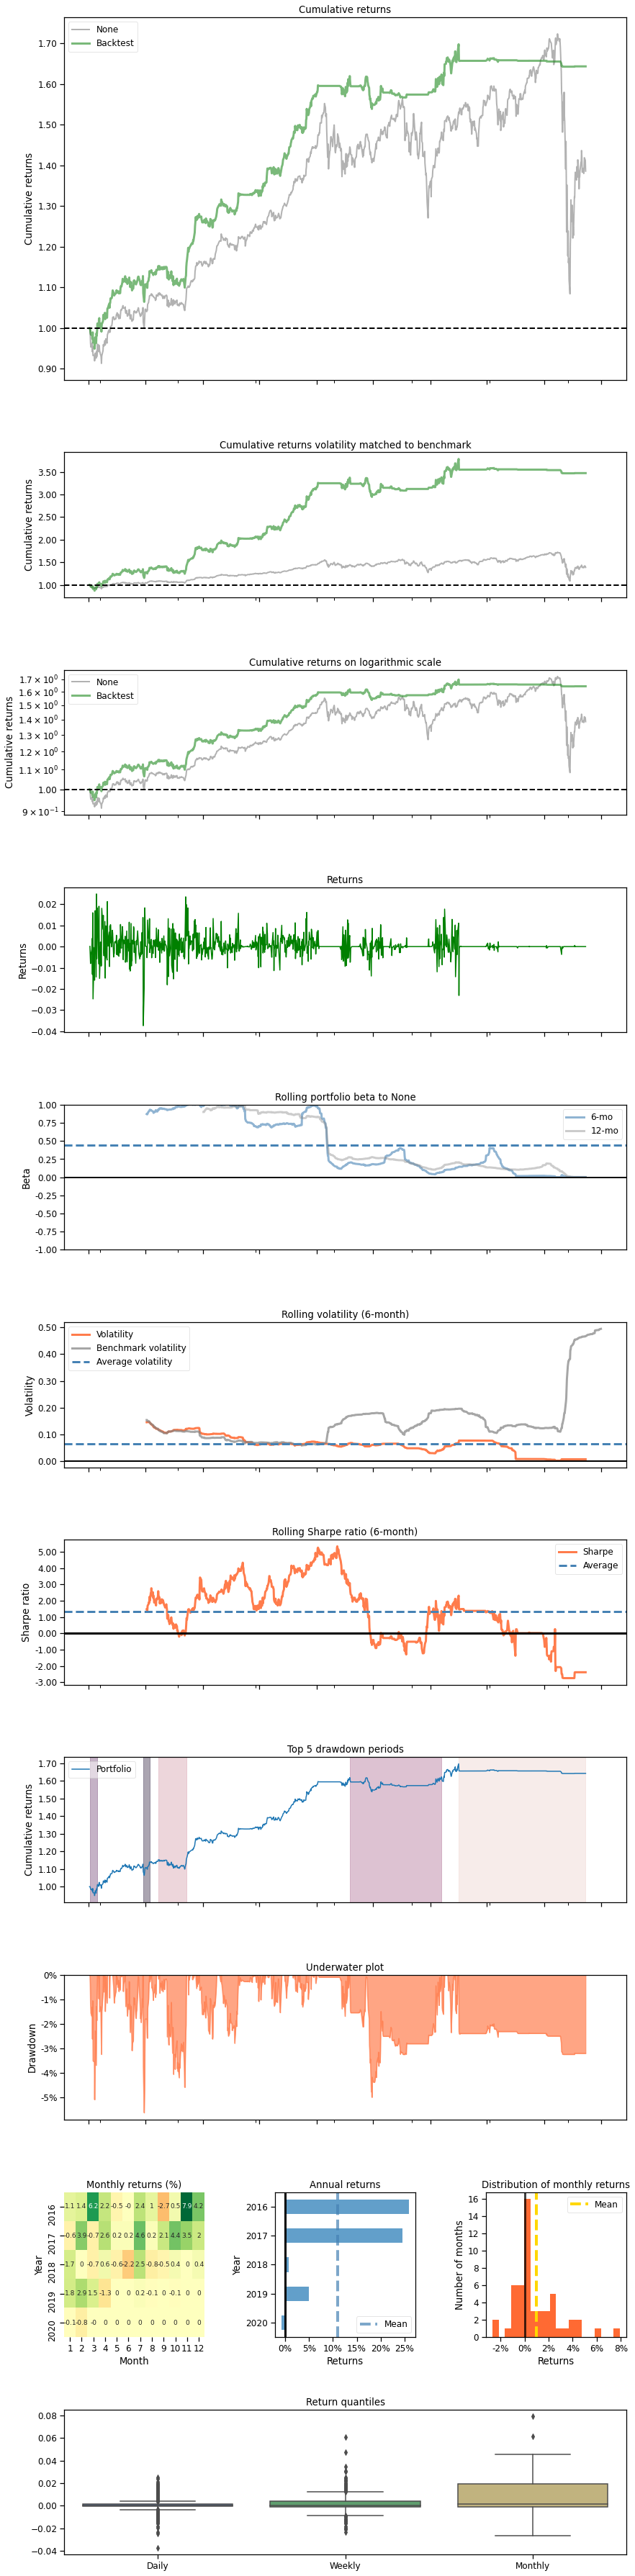

In [26]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = ensemble_strat,
                                   benchmark_rets=dow_strat, set_context=False)

#### BCAP : Discussion
so we see above that the plots are relatively weird.  
The volatility of the DRL strategy is lower than the benchmark. But could this not be because we cease trading in high turbulence periods? Need to figure out.  